# Bibliotecas Usadas

In [1]:
#!/usr/bin/env python3
#bibliotecas que possivelmente serao usadas
import matplotlib.pyplot as plt
import numpy as np
import scipy
import skimage
#import czifile
from itkwidgets import view

#bibliotecas de esqueletizacao
import skimage.morphology as skm
import itk
#import kimimaro
import Modulos.skeleton


#modulos extras
import Modulos.segmentation as seg
import Modulos.image as im
import Modulos.skeleton as skeleton
import Modulos.swc_to_image as swc

#tempo e notificacao. Retirar na finalizacao
import time
#from playsound import playsound #retirar na finalizacao

ImportError: igraph not found, will not be able to convert graphs to igraph format.

# Funcoes Usadas

In [2]:
def ler_imagem(img):
    i = 0
    #isolando o formato da imagem
    while(img[i] != '.'):
        i += 1
    formato = img[i+1:]
    if(formato == 'czi'):
        img = czifile.imread(img)
        img = img.squeeze()
    elif(formato == "npy"):
        img = np.load(img)
    elif (formato == "tiff" or formato == 'tif'):
        img = plt.imread(img)
    return img

In [3]:
def segmentar(img, funcao = 'cesar'):
    if(funcao == 'cesar'):
        threshold = int(input("Digite o valor do limear para fazer a segmentacao:"))
        img_segmentated = (seg.vessel_segmentation(im.Image(img), threshold)).data
        #img_segmentated = img_segmentated.data
    #elif(): #para calcular com outros algoritmos de segmentacao, olhar direito o do itk
    return img_segmentated

In [4]:
def visualizar(img):
    if(img.ndim >= 3):
        view(img) #funcao do itkwidgets
    else:
        plt.imshow(img)

In [5]:
def esqueletizacao(img, algoritmo = 'cesar'):
    #img = segmentar(img)#isso tem que tirar dps tlvz
    if(algoritmo == 'skimage'):
        img_skeleton = skm.skeletonize_3d(img)
        
    elif(algoritmo == 'cesar'):
        img_skeleton = skeleton.skeletonize(im.Image(img))
        img_skeleton = img_skeleton.data
    
    elif(algoritmo == "itk-medialthin"):
        img_skeleton = itk.MedialThicknessImageFilter3D.New(itk.image_from_array(img))
        img_skeleton = itk.GetArrayFromImage(img_skeleton)
    
    elif(algoritmo == 'itk-binarythin'):
        img_skeleton = itk.BinaryThinningImageFilter3D.New(itk.image_from_array(img))
        img_skeleton = itk.GetArrayFromImage(img_skeleton)
    
    elif(algoritmo == "kimimaro"):
        print(kimimaro.skeletonize(img, progress = True))
        
        
    return img_skeleton

In [6]:
def save_2D(img, nome, funcao):
    #nome da imagem sem a extencao
    i = 0
    print(nome)
    while(nome[i] != '.'):
        i += 1
    formato = nome[i + 1:]
    #print(formato)
    nome = nome[:i] + "_" + funcao + ".tiff"
    
    print(nome)
    if(formato == "tiff" or formato == "tif"):
        img_saida = np.zeros((img.shape[0], img.shape[1], 3), dtype = np.uint8)
        
        imgA = img * 255
        
    
    else:
        img_proj = np.max(img, axis=0) #transformando a imagem em 2D
        img_saida = np.zeros((img_proj.shape[0], img_proj.shape[1], 3), dtype = np.uint8)#criando uma imagem 2D com zeros

        imgA = img_proj * 255 #nonbinary(img1)

    #Colocando valores da imagem img em todos os canais de cor para salva-las em tom de cinza
    img_saida[:,:,0] = imgA.copy()
    img_saida[:,:,1] = imgA.copy() 
    img_saida[:,:,2] = imgA.copy() 
    rows, cols = np.nonzero(imgA)
    img_saida[rows,cols] = (255, 255, 255)

    plt.imsave(nome, img_saida)
    print("Arquivo salvo com SUCESSO: ", nome)

def save_3D(img, nome, funcao):
    #nome da imagem sem a extencao
    i = 0
    while(nome[i] != '.'):
        i += 1
    nome = nome[:i] + "_" + funcao
    #salvando a imagem
    np.save(nome, img)
    print("Arquivo salvo com SUCESSO: ", nome)
    
def merge_image(img1, img2):
    """esta funcao recebe a imagem original binaria (img1) e o esqueleto binario da mesma (img2), tranforma elas em 
    uma imagem de saida
"""
    
    print(im.Image(img2))
    #print(img2.shape)
    img_saida = np.zeros((img1.shape[0], img1.shape[1], 3), dtype = np.uint8)
    
    #imgA = img1 / 255 #nonbinary(img1)
    imgB = img2 // 255 #nonbinary(img2)
    
    img_saida[:,:,0] = img1.copy()
    img_saida[:,:,1] = img1.copy() 
    img_saida[:,:,2] = img1.copy() 
    
    plt.title("IMGsaida")
    plt.imshow(img_saida)
    
    rows, cols = np.nonzero(img2)
    #print(imgA.copy())
    img_saida[rows,cols] = (255, 0, 0)
    #plt.imshow(img_saida)
    
    return img_saida

# Funcao Principal

In [ ]:
operacao = 1
nome = '0'
funcao = "0"
while(operacao > 0 and operacao < 7):
    operacao = int(input('[1] Importar Imagem; \n[2] Segmentar Imagem; \n[3] Esqueletizar Imagem;\n[4] Mesclar imagens;\n[5] Salvar Imagem em 2D;\n[6] Salvar Imagem em 3D;\n[0] Finalizar operacoes\n'))

    if(operacao == 1):#importar imagem
        nome = input("Digite o nome do arquivo junto com a extencao:")
        img = ler_imagem(nome)
        #nome_saida = input("Digite o nome do arquivo de saida junto com a extencao:")
        #img_saida = ler_imagem(nome_saida)
        #print(np.sum(img[:,:,0] != img[:,:,2]))##retirar
        #print(np.sum(img_saida[:,:,0] != img_saida[:,:,2]))##retirar
    
    
    
    elif(operacao == 2 and nome != '0'):#segmentacao
        time_start = time.time()
        img_saida = segmentar(img)
        funcao = "segmentacao"
        #playsound("notification.mp3")#notificacao, na finalizacao tem de ser tirada
        
        print("tempo de execucao: ", time.time() - time_start)
    
    elif(operacao == 3 and nome != '0'):#esqueletizacao
        time_start = time.time()
        funcao = input("Qual Funcao Usar? Cesar, itk-medialthin, itk-binarythin, skimage: ")
        img_saida = esqueletizacao(img_saida, funcao)
        
        #playsound("notification.mp3")#notificacao, na finalizacao tem de ser tirada
        
        print("tempo de execucao: ", time.time() - time_start)
        
    elif(operacao == 4 and nome != '0'): # mesclar o esqueleto de uma imagem com a imagem original
        img_saida = merge_image(img[:,:,0], img_saida[:,:,0])
    
    elif(operacao == 5 and nome != '0'): #salvar imagem 2D
        save_2D(img_saida, nome, funcao)
        
    elif(operacao == 6 and nome != '0'): #salvar imagem 3D
        save_3D(img_saida, nome, funcao)
    
    
        
    elif(nome == '0' and operacao != 0):
        print('Entrada ainda nao processada, entre na operacao 1')
        
    elif(operacao == 0):#finalizar
        print('Fim da operacao')

(1104, 1376)


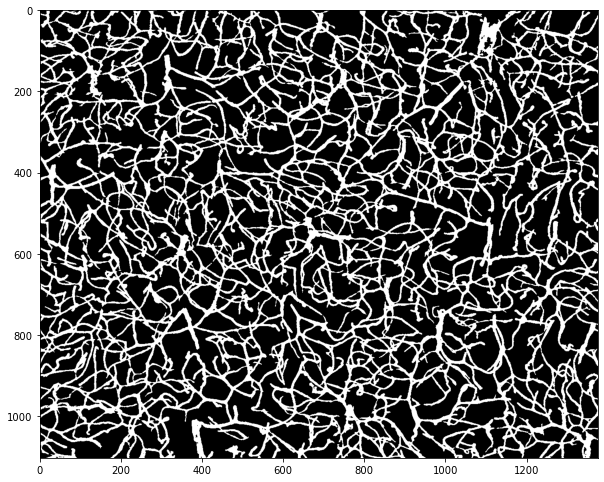

In [18]:
print(img_saida.shape)
plt.figure(figsize = [10,10])
plt.imshow(img_saida, 'gray')

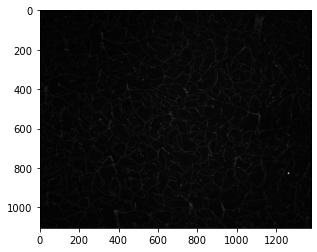

In [9]:
img = ler_imagem("Development project@Cre ERT2 P14 Peter@S53-P14-PC-C.tiff")
plt.imshow(img, 'gray')

# Visualizacao da imagem original e o esqueleto

In [10]:
#imagem original
img2 = ler_imagem("3D P0@CTL-3-FC-A_new.czi")
view(img2)

FileNotFoundError: [Errno 2] No such file or directory: '/home/fadiga/Desktop/IC/Codigos/3D P0@CTL-3-FC-A_new.czi'

In [ ]:
#imagem Tratada
view(img_saida)

Tentativa de fazer a visualizacao do formato swc

In [ ]:
"""import neurom as nm
nrm = nm.load_neuron("/kimimaro/1.swc")

fig, ax = nm.viewer.draw(nrm)
fig.show()
fig, ax = nm.viewer.draw(nrm, mode = '3d')
fig.show()"""